In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

c:\Users\Kian\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
df = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values(by = 'skill_count', ascending = False).head(10)
skill_stats


,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


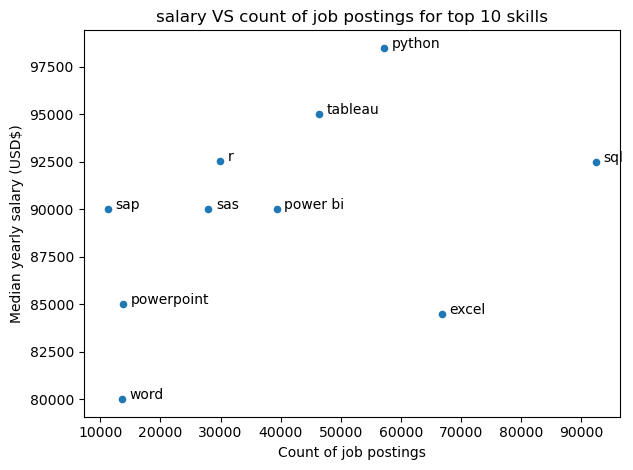

In [38]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel("Count of job postings")
plt.ylabel("Median yearly salary (USD$)")
plt.title('salary VS count of job postings for top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i] + 1250, skill_stats['median_salary'].iloc[i], txt)

plt.show()

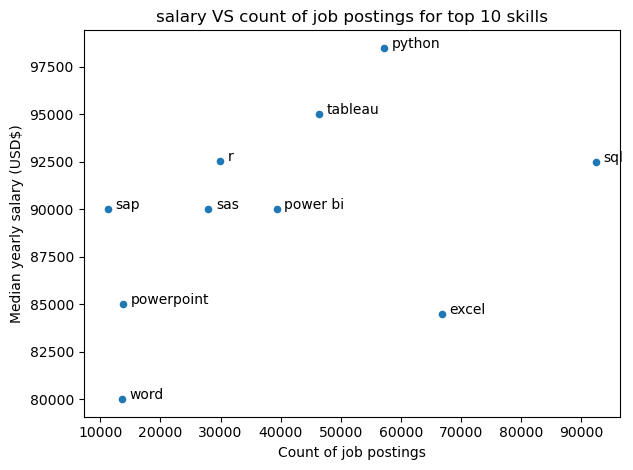

In [39]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel("Count of job postings")
plt.ylabel("Median yearly salary (USD$)")
plt.title('salary VS count of job postings for top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].loc[txt] + 1250, skill_stats['median_salary'].loc[txt], txt)

plt.show()